In [1]:
from main.compiling.compilers.AncillaPerCheckCompiler import AncillaPerCheckCompiler
from main.compiling.noise.models.CircuitLevelNoise import CircuitLevelNoise
from main.compiling.syndrome_extraction.extractors.ancilla_per_check.mixed.CxCyCzExtractor import CxCyCzExtractor
from main.codes.tic_tac_toe.HoneycombCode import HoneycombCode
from main.codes.tic_tac_toe.gauge_honeycomb_code import GaugeHoneycombCode
from main.codes.tic_tac_toe.FloquetColourCode import FloquetColourCode
from main.codes.tic_tac_toe.TicTacToeCode import TicTacToeCode
from main.utils.enums import State
from main.building_blocks.pauli import Pauli
from main.building_blocks.pauli.PauliLetter import PauliLetter
import stim
import sinter 
import matplotlib.pyplot as plt
import numpy as np
from beliefmatching import BeliefMatchingSinterDecoder
from main.utils.Colour import Blue, Green, Red
import os

# Load data

In [5]:
#gauge_hcc_X0_samples = sinter.stats_from_csv_files('resume/GaugeHoneycombCodeX_0_2.json')
#hcc_X0_samples = sinter.stats_from_csv_files('resume/HoneycombCodeX_0_4.json')
#def compress_data():
#for file in os.listdir('resume_15_2/'):
#    os.system(f"sinter combine resume_15_2/data.csv > resume_15_2/compress_data.csv")
    os.system(f"rm resume_15_2/data.csv")
#    os.system(f"mv resume_15_2/compress_data.csv resume_15_2/data.csv")
    new_samples = sinter.stats_from_csv_files('../data/compress_'+file)
samples = sinter.stats_from_csv_files('resume_15_3/data.csv')


# Logical error rate comparison

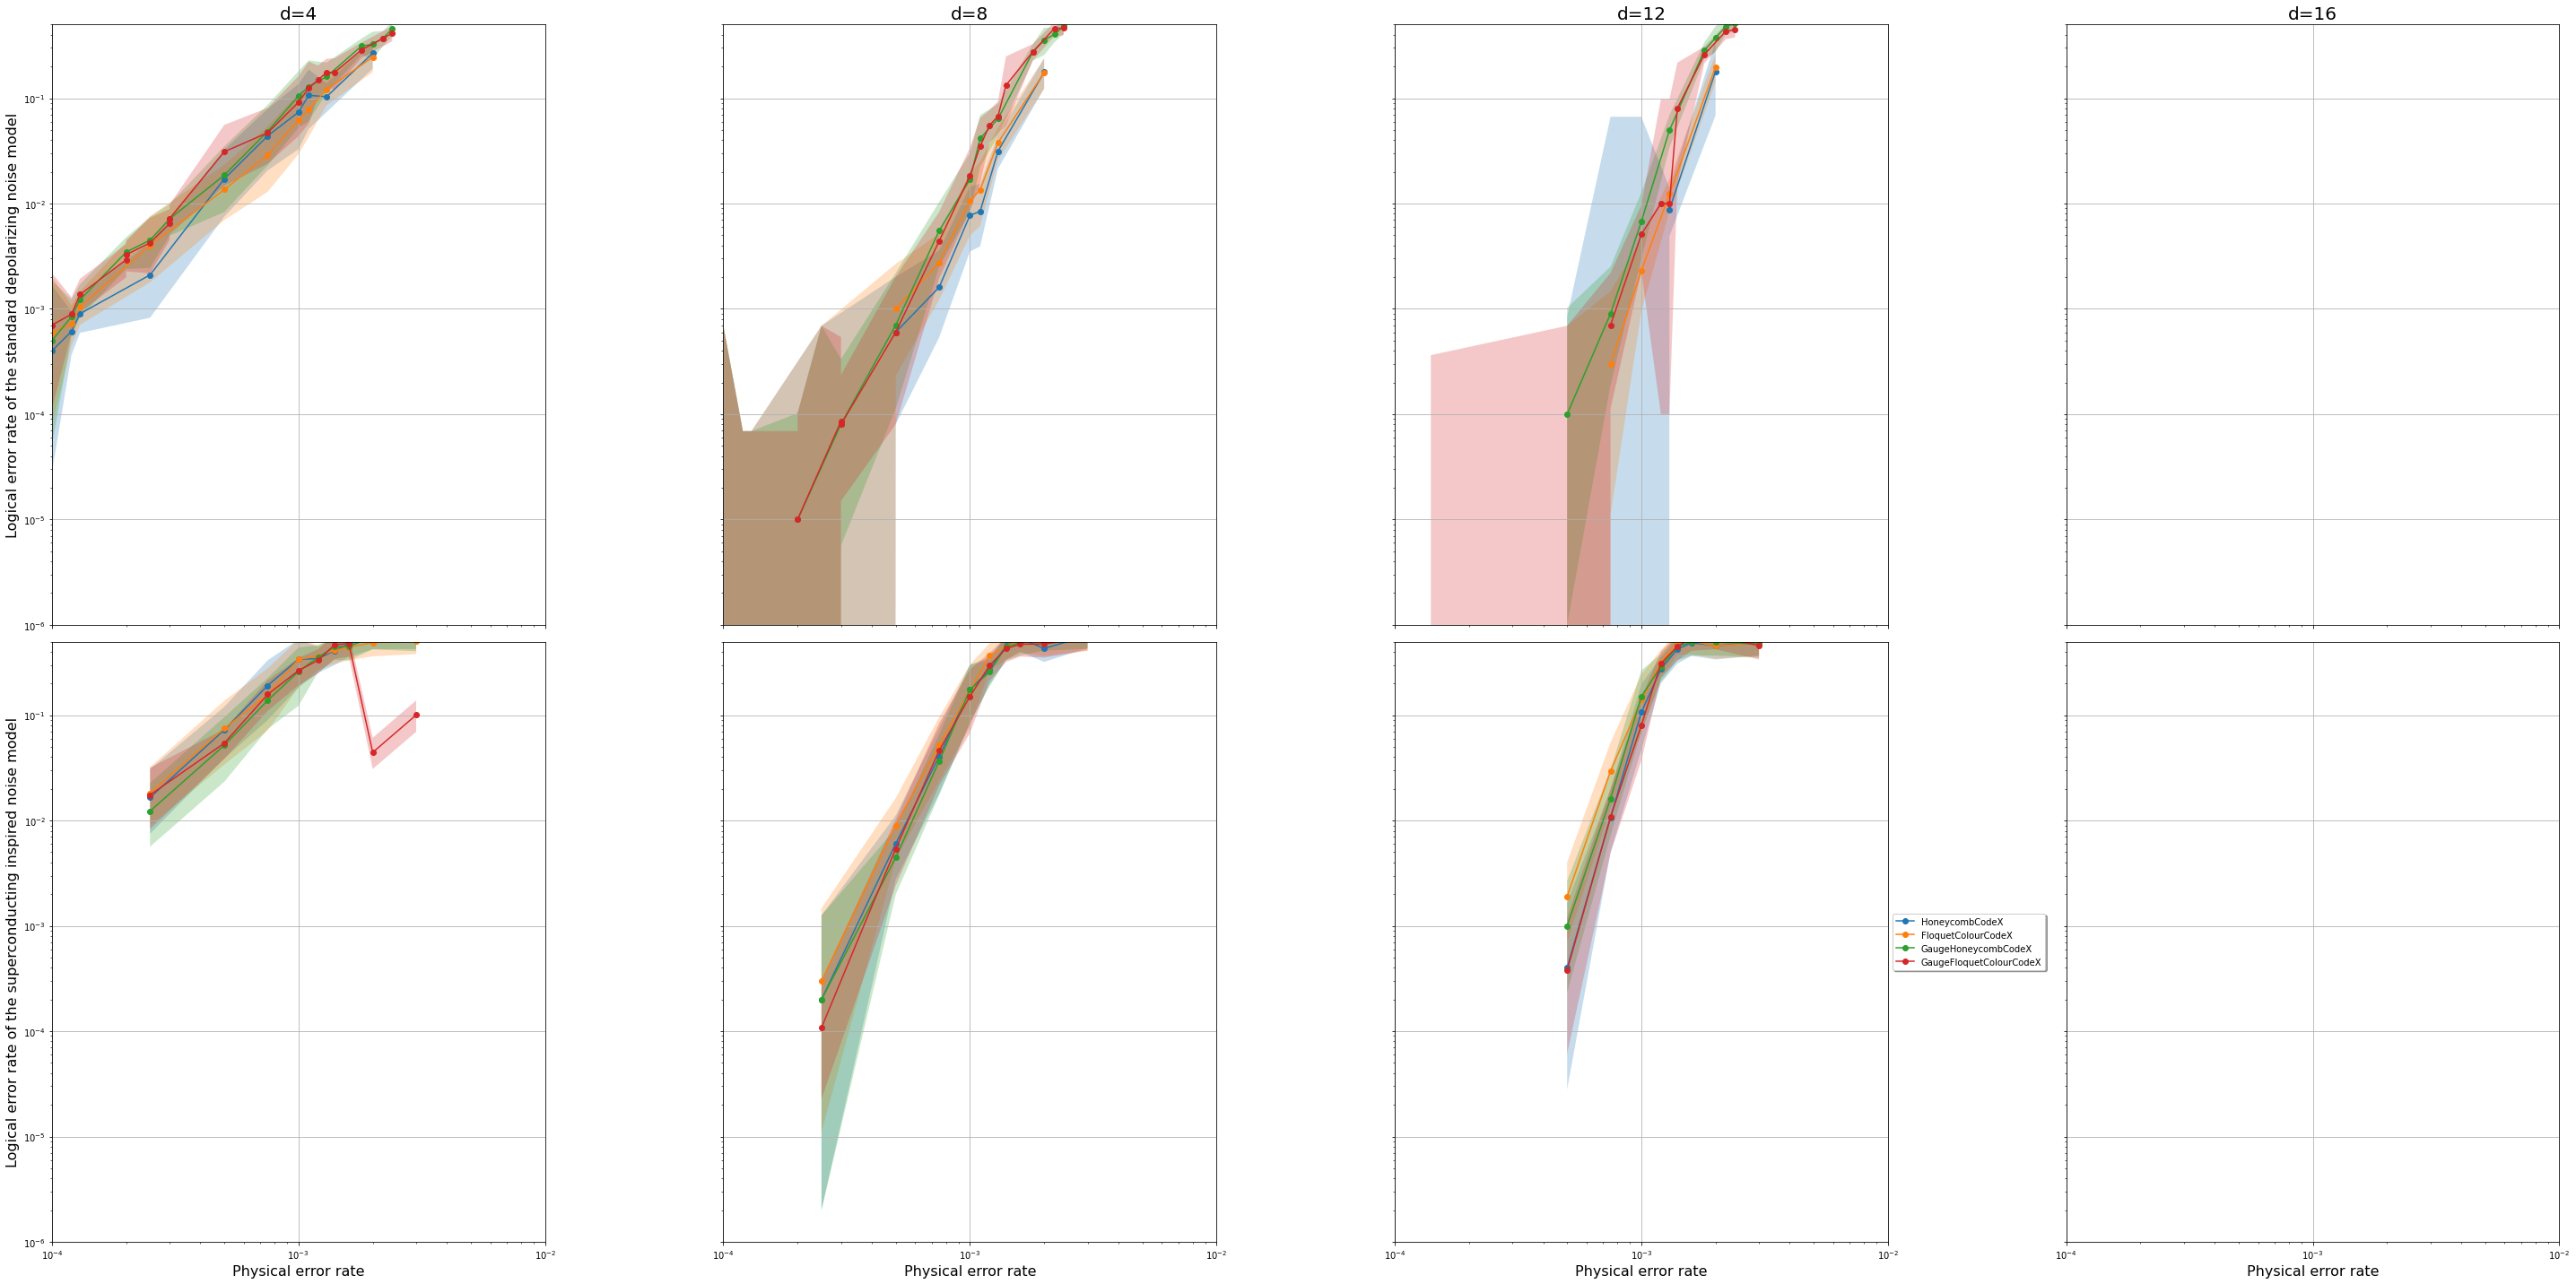

In [6]:
fig, axis = plt.subplots(2, 4,figsize=(40,20), sharex=True, sharey=True)

def plot_error_rate(ax, stats,  distance,factors,codes, noise_model, decoder='pymatching'):
    for index, factor in enumerate(factors):
        code = codes[index]
        sinter.plot_error_rate(
            ax=ax,
            stats=stats,
            group_func= lambda stat: f"{code}",
            filter_func = lambda s : s.json_metadata['distance'] == distance and s.decoder == decoder and s.json_metadata['code'] == code and s.json_metadata['r']==factor and s.json_metadata['noise_model']==noise_model,
            x_func=lambda stat: stat.json_metadata['p'])

plot_error_rate(axis[0][0], samples, 4, [8,4,4,2], ["HoneycombCodeX", "FloquetColourCodeX", "GaugeHoneycombCodeX", "GaugeFloquetColourCodeX"], "CircuitLevelNoise","beliefmatching")
plot_error_rate(axis[0][1], samples, 8, [8,4,4,2], ["HoneycombCodeX", "FloquetColourCodeX", "GaugeHoneycombCodeX", "GaugeFloquetColourCodeX"], "CircuitLevelNoise", "beliefmatching")
plot_error_rate(axis[0][2], samples, 12, [8,4,4,2], ["HoneycombCodeX", "FloquetColourCodeX", "GaugeHoneycombCodeX", "GaugeFloquetColourCodeX"], "CircuitLevelNoise", "beliefmatching")
plot_error_rate(axis[0][3], samples, 16, [8,4,4,2], ["HoneycombCodeX", "FloquetColourCodeX", "GaugeHoneycombCodeX", "GaugeFloquetColourCodeX"], "CircuitLevelNoise", "beliefmatching")

plot_error_rate(axis[1][0], samples, 4, [12,6,6,3], ["HoneycombCodeX", "FloquetColourCodeX", "GaugeHoneycombCodeX", "GaugeFloquetColourCodeX"], "SuperconductingNoise", "beliefmatching")
plot_error_rate(axis[1][1], samples, 8, [12,6,6,3], ["HoneycombCodeX", "FloquetColourCodeX", "GaugeHoneycombCodeX", "GaugeFloquetColourCodeX"], "SuperconductingNoise", "beliefmatching")
plot_error_rate(axis[1][2], samples, 12, [12,6,6,3], ["HoneycombCodeX", "FloquetColourCodeX", "GaugeHoneycombCodeX", "GaugeFloquetColourCodeX"], "SuperconductingNoise", "beliefmatching")
plot_error_rate(axis[1][3], samples, 16, [12,6,6,3], ["HoneycombCodeX", "FloquetColourCodeX", "GaugeHoneycombCodeX", "GaugeFloquetColourCodeX"], "SuperconductingNoise", "beliefmatching")

for two_ax in axis:
    for ax in two_ax:
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.grid()
        ax.set_xlim(0.0001, 0.01)
        ax.set_ylim(0.000001, 0.5)
        ax.tick_params(axis='both', which='major', labelsize=10)



axis[0][0].set_ylabel('Logical error rate of the standard depolarizing noise model',fontsize=16)
axis[1][0].set_ylabel('Logical error rate of the superconducting inspired noise model',fontsize=16)

axis[1][0].set_xlabel('Physical error rate',fontsize=16)
axis[1][1].set_xlabel('Physical error rate',fontsize=16)
axis[1][2].set_xlabel('Physical error rate',fontsize=16)
axis[1][3].set_xlabel('Physical error rate',fontsize=16)

#ax.set_ylabel('logical error rate',fontsize=10)
axis[1][2].legend(loc='center left', bbox_to_anchor=(1, 0.5),  fancybox=True, shadow=True)

axis[0][0].set_title('d=4',fontsize=20)
axis[0][1].set_title('d=8',fontsize=20)
axis[0][2].set_title('d=12',fontsize=20)
axis[0][3].set_title('d=16',fontsize=20)

plt.tight_layout()

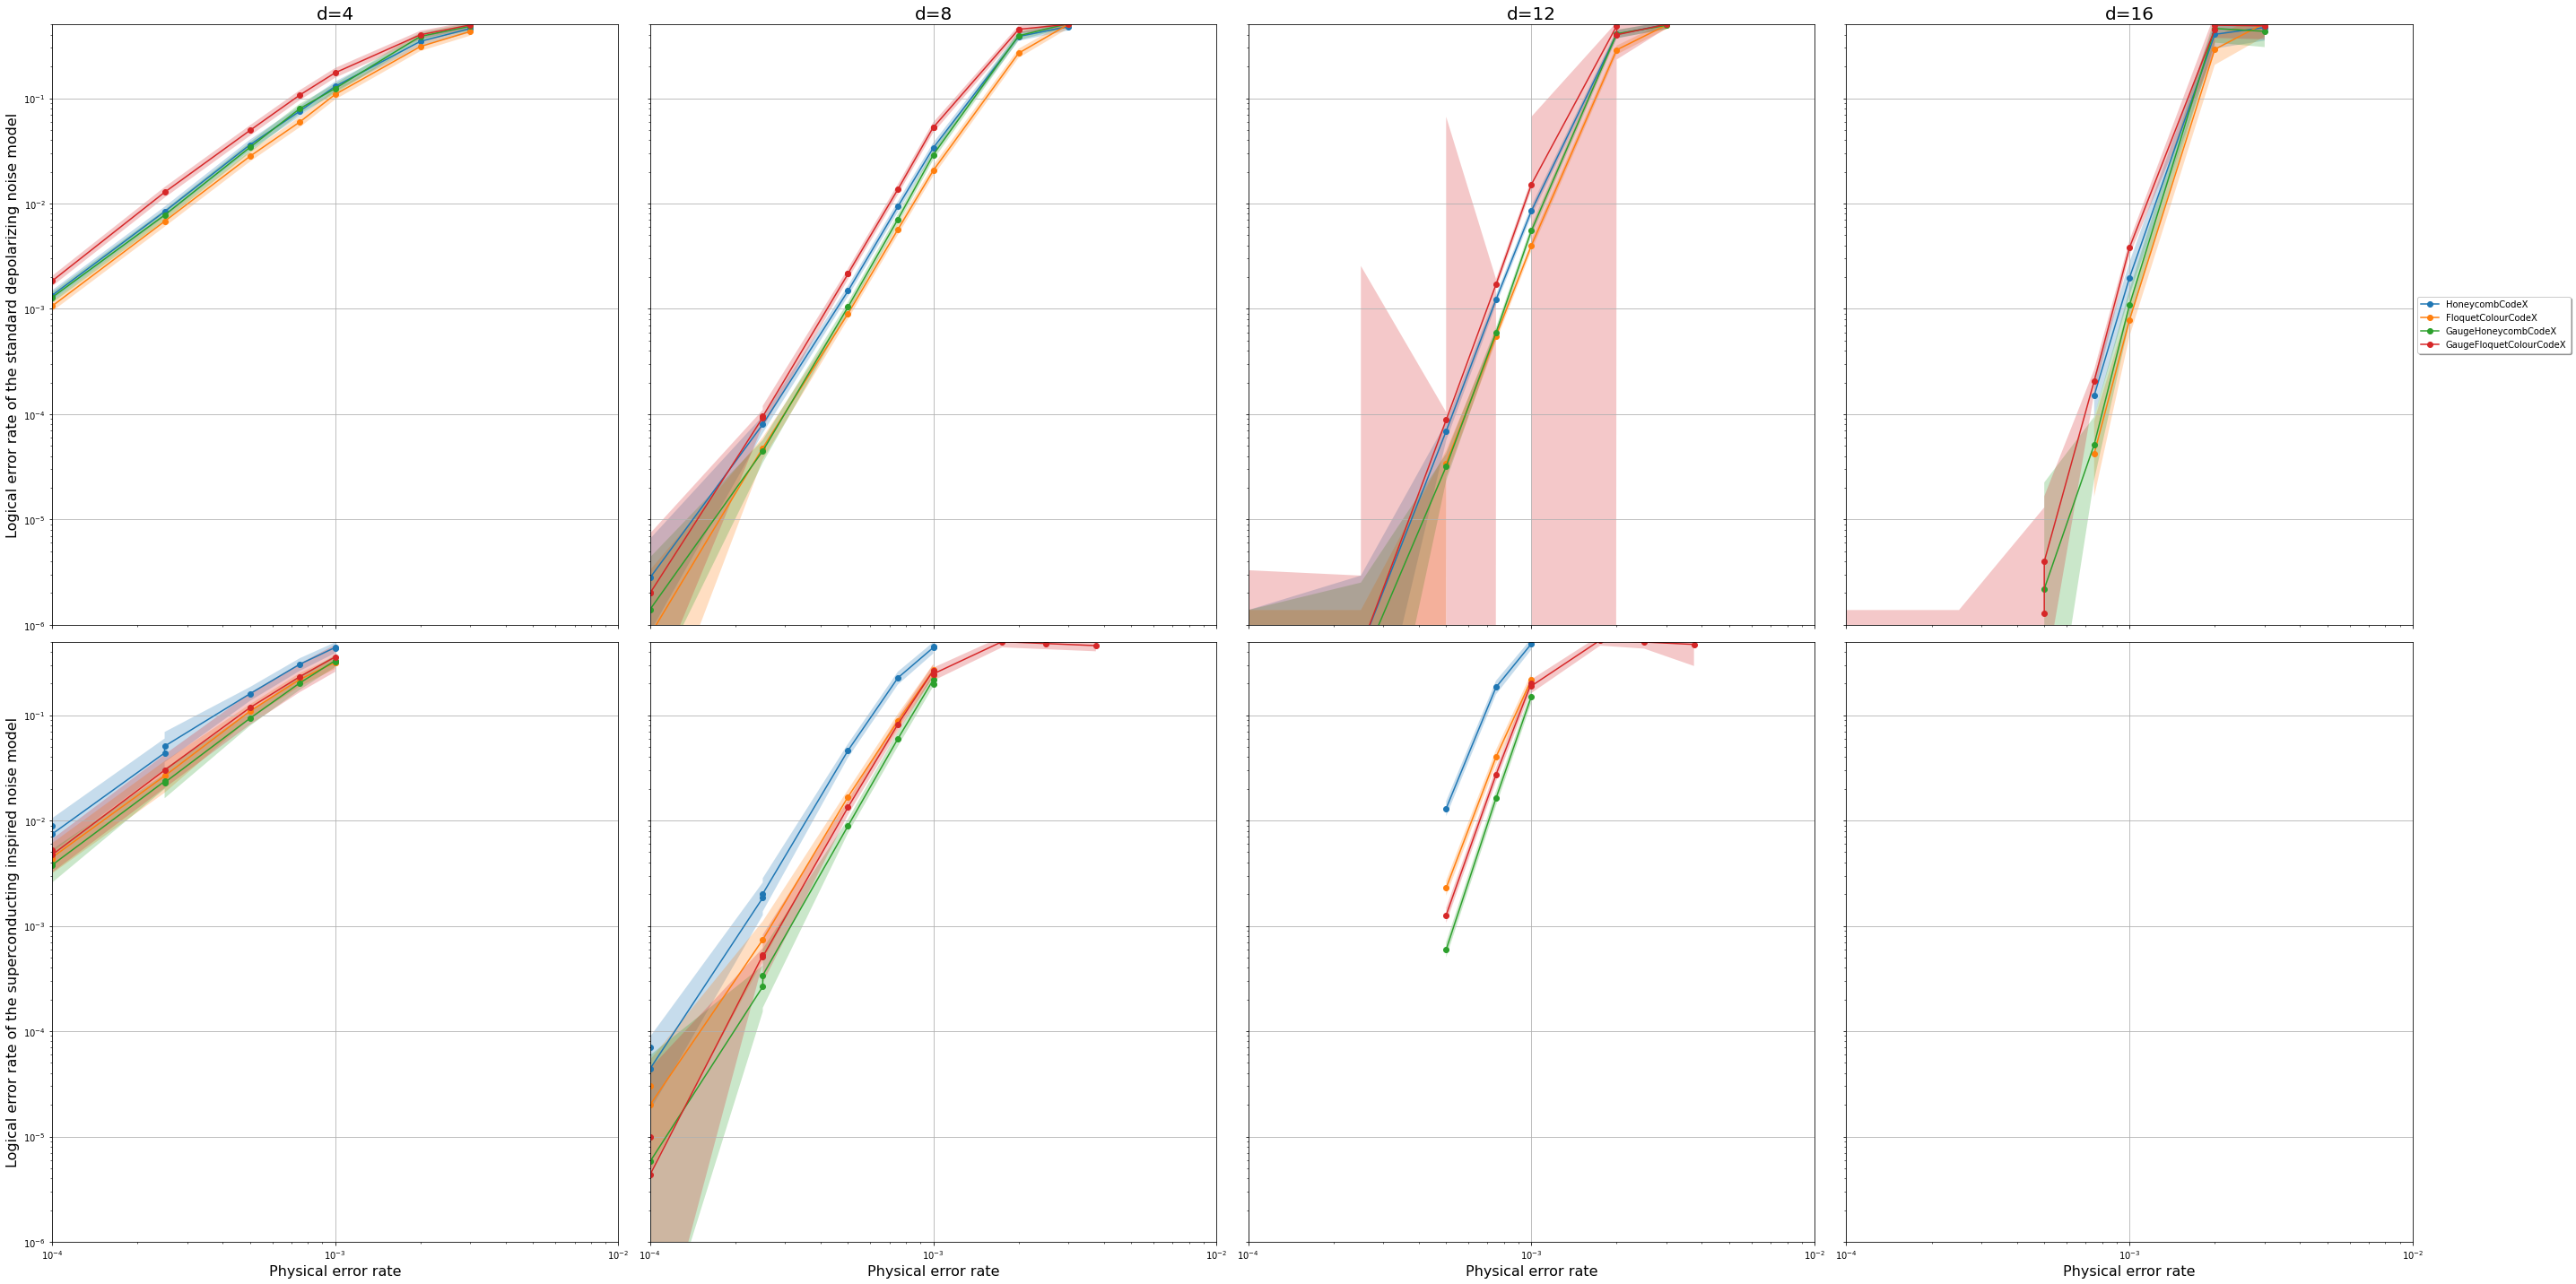

In [4]:
fig, axis = plt.subplots(2, 4,figsize=(40,20), sharex=True, sharey=True)

def plot_error_rate(ax, stats,  distance,factors,codes, noise_model, decoder='pymatching'):
    for index, factor in enumerate(factors):
        code = codes[index]
        sinter.plot_error_rate(
            ax=ax,
            stats=stats,
            group_func= lambda stat: f"{code}",
            filter_func = lambda s : s.json_metadata['distance'] == distance and s.decoder == decoder and s.json_metadata['code'] == code and s.json_metadata['r']==factor and s.json_metadata['noise_model']==noise_model,
            x_func=lambda stat: stat.json_metadata['p'])

plot_error_rate(axis[0][0], samples, 4, [8,4,4,2], ["HoneycombCodeX", "FloquetColourCodeX", "GaugeHoneycombCodeX", "GaugeFloquetColourCodeX"], "CircuitLevelNoise")
plot_error_rate(axis[0][1], samples, 8, [8,4,4,2], ["HoneycombCodeX", "FloquetColourCodeX", "GaugeHoneycombCodeX", "GaugeFloquetColourCodeX"], "CircuitLevelNoise")
plot_error_rate(axis[0][2], samples, 12, [8,4,4,2], ["HoneycombCodeX", "FloquetColourCodeX", "GaugeHoneycombCodeX", "GaugeFloquetColourCodeX"], "CircuitLevelNoise")
plot_error_rate(axis[0][3], samples, 16, [8,4,4,2], ["HoneycombCodeX", "FloquetColourCodeX", "GaugeHoneycombCodeX", "GaugeFloquetColourCodeX"], "CircuitLevelNoise")

plot_error_rate(axis[1][0], samples, 4, [12,6,6,3], ["HoneycombCodeX", "FloquetColourCodeX", "GaugeHoneycombCodeX", "GaugeFloquetColourCodeX"], "SuperconductingNoise")
plot_error_rate(axis[1][1], samples, 8, [12,6,6,3], ["HoneycombCodeX", "FloquetColourCodeX", "GaugeHoneycombCodeX", "GaugeFloquetColourCodeX"], "SuperconductingNoise")
plot_error_rate(axis[1][2], samples, 12, [12,6,6,3], ["HoneycombCodeX", "FloquetColourCodeX", "GaugeHoneycombCodeX", "GaugeFloquetColourCodeX"], "SuperconductingNoise")
plot_error_rate(axis[1][3], samples, 16, [12,6,6,3], ["HoneycombCodeX", "FloquetColourCodeX", "GaugeHoneycombCodeX", "GaugeFloquetColourCodeX"], "SuperconductingNoise")

for two_ax in axis:
    for ax in two_ax:
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.grid()
        ax.set_xlim(0.0001, 0.01)
        ax.set_ylim(0.000001, 0.5)
        ax.tick_params(axis='both', which='major', labelsize=10)



axis[0][0].set_ylabel('Logical error rate of the standard depolarizing noise model',fontsize=16)
axis[1][0].set_ylabel('Logical error rate of the superconducting inspired noise model',fontsize=16)

axis[1][0].set_xlabel('Physical error rate',fontsize=16)
axis[1][1].set_xlabel('Physical error rate',fontsize=16)
axis[1][2].set_xlabel('Physical error rate',fontsize=16)
axis[1][3].set_xlabel('Physical error rate',fontsize=16)

#ax.set_ylabel('logical error rate',fontsize=10)
axis[0][3].legend(loc='center left', bbox_to_anchor=(1, 0.5),  fancybox=True, shadow=True)

axis[0][0].set_title('d=4',fontsize=20)
axis[0][1].set_title('d=8',fontsize=20)
axis[0][2].set_title('d=12',fontsize=20)
axis[0][3].set_title('d=16',fontsize=20)

plt.tight_layout()

# Threshold comparison

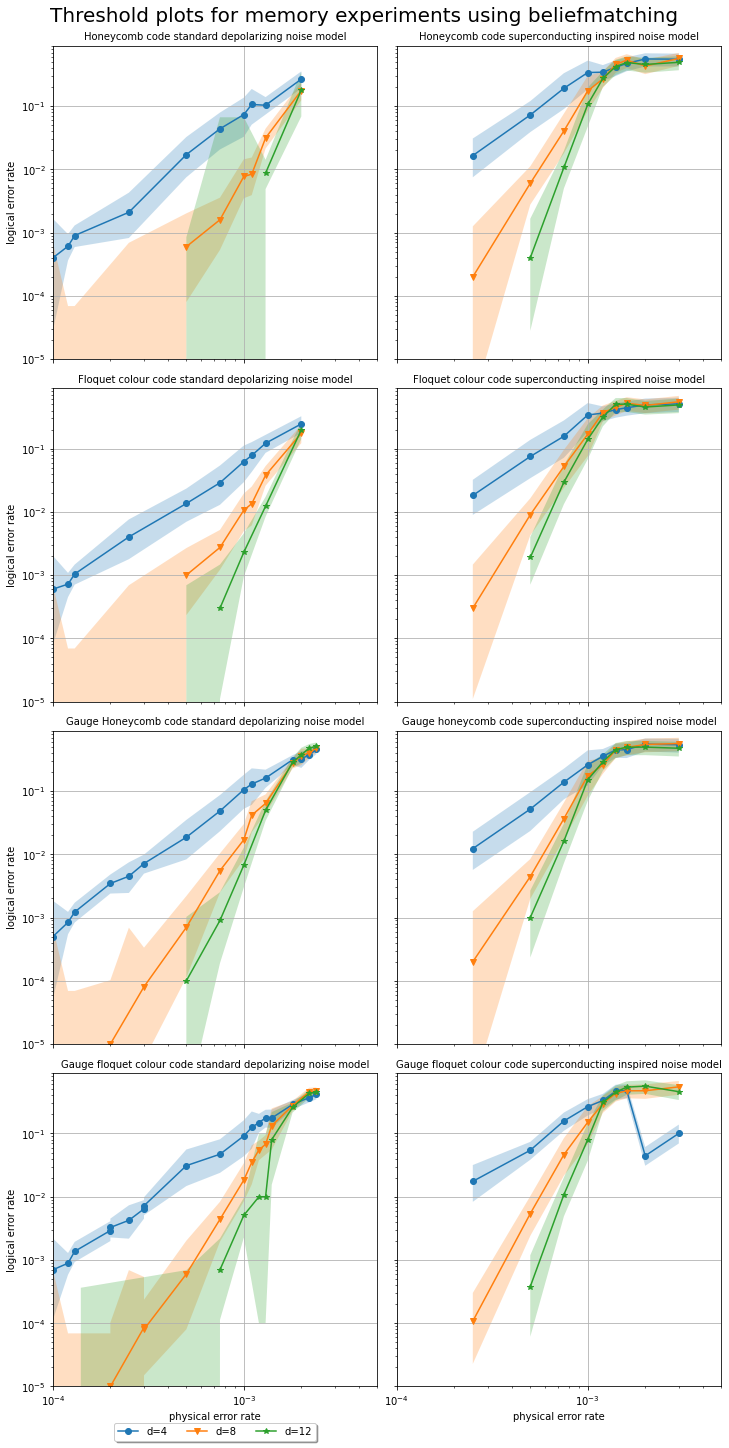

In [8]:
fig, axis = plt.subplots(4, 2,figsize=(10,20), sharex=True, sharey=True, constrained_layout=True)

def plot_threshold(ax, stats,factor,code, noise_model):#, filter_func, x_func):

    sinter.plot_error_rate(
        ax=ax,
        stats=stats,
        group_func= lambda stat: f"d={stat.json_metadata['distance']}",
        filter_func = lambda s : s.decoder == 'beliefmatching' and s.json_metadata['code'] == code and s.json_metadata['r']==factor and s.json_metadata['noise_model']==noise_model,
        x_func=lambda stat: stat.json_metadata['p'])
    
plot_threshold(axis[0][0], samples, 8, "HoneycombCodeX", "CircuitLevelNoise")
plot_threshold(axis[1][0], samples, 4, "FloquetColourCodeX", "CircuitLevelNoise")
plot_threshold(axis[2][0], samples, 4, "GaugeHoneycombCodeX", "CircuitLevelNoise")
plot_threshold(axis[3][0], samples, 2, "GaugeFloquetColourCodeX", "CircuitLevelNoise")

plot_threshold(axis[0][1], samples, 12, "HoneycombCodeX", "SuperconductingNoise")
plot_threshold(axis[1][1], samples, 6, "FloquetColourCodeX", "SuperconductingNoise")
plot_threshold(axis[2][1], samples, 6, "GaugeHoneycombCodeX", "SuperconductingNoise")
plot_threshold(axis[3][1], samples, 3, "GaugeFloquetColourCodeX", "SuperconductingNoise")

for two_ax in axis:
    for ax in two_ax:
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.grid()
        ax.set_xlim(0.0001, 0.005)

axis[0][0].set_title("Honeycomb code standard depolarizing noise model",fontsize=10)
axis[1][0].set_title("Floquet colour code standard depolarizing noise model",fontsize=10)
axis[2][0].set_title("Gauge Honeycomb code standard depolarizing noise model",fontsize=10)
axis[3][0].set_title("Gauge floquet colour code standard depolarizing noise model",fontsize=10)

axis[0][1].set_title("Honeycomb code superconducting inspired noise model",fontsize=10)
axis[1][1].set_title("Floquet colour code superconducting inspired noise model",fontsize=10)
axis[2][1].set_title("Gauge honeycomb code superconducting inspired noise model",fontsize=10)
axis[3][1].set_title("Gauge floquet colour code superconducting inspired noise model",fontsize=10)

axis[3][0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

axis[0][0].set_ylim(0.00001,0.9)
axis[3][0].set_xlabel('physical error rate')
axis[3][1].set_xlabel('physical error rate')
axis[0][0].set_ylabel('logical error rate')
axis[1][0].set_ylabel('logical error rate')
axis[2][0].set_ylabel('logical error rate')
axis[3][0].set_ylabel('logical error rate')

fig.suptitle('Threshold plots for memory experiments using beliefmatching', fontsize=20)
plt.savefig('memory_experiment_threshold_beliefmatching.svg')



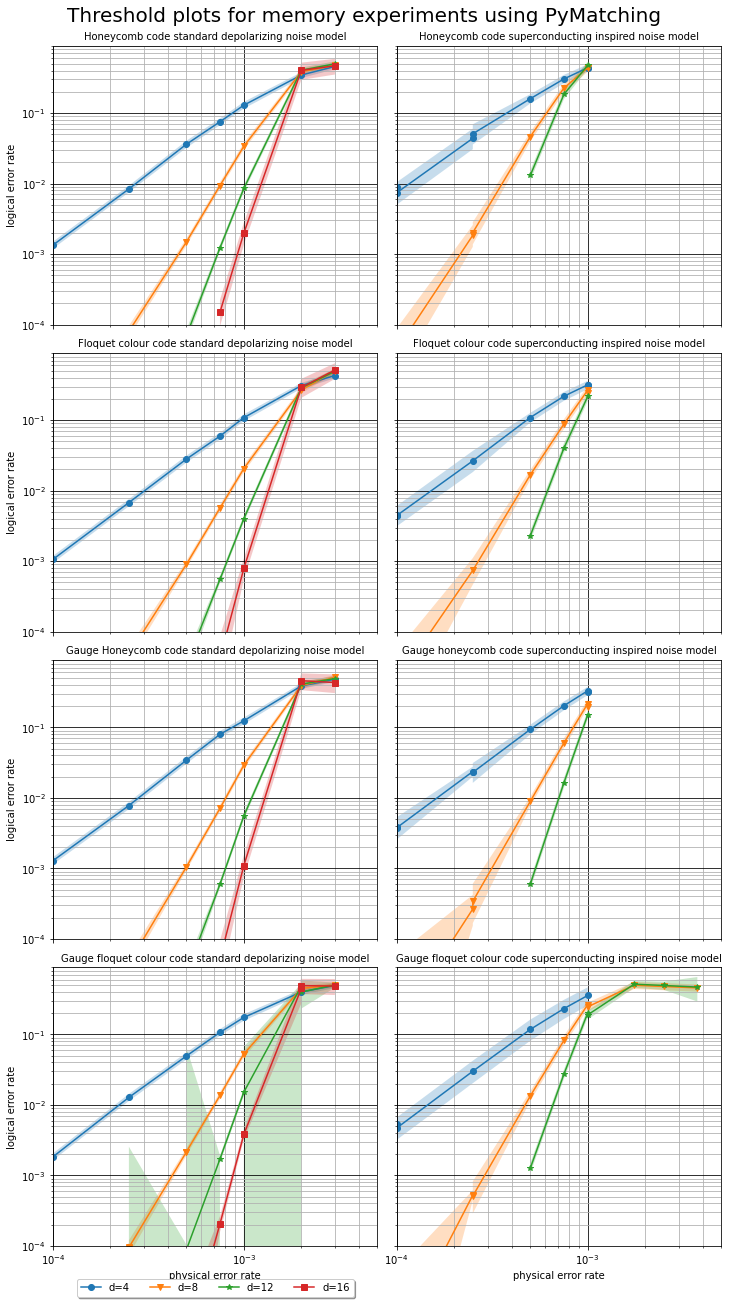

In [6]:
fig, axis = plt.subplots(4, 2,figsize=(10,18), sharex=True, sharey=True, constrained_layout=True)

def plot_threshold(ax, stats,factor,code, noise_model):#, filter_func, x_func):

    sinter.plot_error_rate(
        ax=ax,
        stats=stats,
        group_func= lambda stat: f"d={stat.json_metadata['distance']}",
        filter_func = lambda s : s.decoder == 'pymatching' and s.json_metadata['code'] == code and s.json_metadata['r']==factor and s.json_metadata['noise_model']==noise_model,
        x_func=lambda stat: stat.json_metadata['p'])
    
plot_threshold(axis[0][0], samples, 8, "HoneycombCodeX", "CircuitLevelNoise")
plot_threshold(axis[1][0], samples, 4, "FloquetColourCodeX", "CircuitLevelNoise")
plot_threshold(axis[2][0], samples, 4, "GaugeHoneycombCodeX", "CircuitLevelNoise")
plot_threshold(axis[3][0], samples, 2, "GaugeFloquetColourCodeX", "CircuitLevelNoise")

plot_threshold(axis[0][1], samples, 12, "HoneycombCodeX", "SuperconductingNoise")
plot_threshold(axis[1][1], samples, 6, "FloquetColourCodeX", "SuperconductingNoise")
plot_threshold(axis[2][1], samples, 6, "GaugeHoneycombCodeX", "SuperconductingNoise")
plot_threshold(axis[3][1], samples, 3, "GaugeFloquetColourCodeX", "SuperconductingNoise")

for two_ax in axis:
    for ax in two_ax:
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_xlim(0.0001, 0.005)
        ax.grid(which='minor')
        ax.grid(which='major', color='black')

axis[0][0].set_title("Honeycomb code standard depolarizing noise model",fontsize=10)
axis[1][0].set_title("Floquet colour code standard depolarizing noise model",fontsize=10)
axis[2][0].set_title("Gauge Honeycomb code standard depolarizing noise model",fontsize=10)
axis[3][0].set_title("Gauge floquet colour code standard depolarizing noise model",fontsize=10)

axis[0][1].set_title("Honeycomb code superconducting inspired noise model",fontsize=10)
axis[1][1].set_title("Floquet colour code superconducting inspired noise model",fontsize=10)
axis[2][1].set_title("Gauge honeycomb code superconducting inspired noise model",fontsize=10)
axis[3][1].set_title("Gauge floquet colour code superconducting inspired noise model",fontsize=10)

axis[3][0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

axis[0][0].set_ylim(0.0001,0.9)
axis[3][0].set_xlabel('physical error rate')
axis[3][1].set_xlabel('physical error rate')
axis[0][0].set_ylabel('logical error rate')
axis[1][0].set_ylabel('logical error rate')
axis[2][0].set_ylabel('logical error rate')
axis[3][0].set_ylabel('logical error rate')

fig.suptitle('Threshold plots for memory experiments using PyMatching', fontsize=20)
plt.savefig('memory_experiment_threshold_pymatching.svg')

#fig.tight_layout()


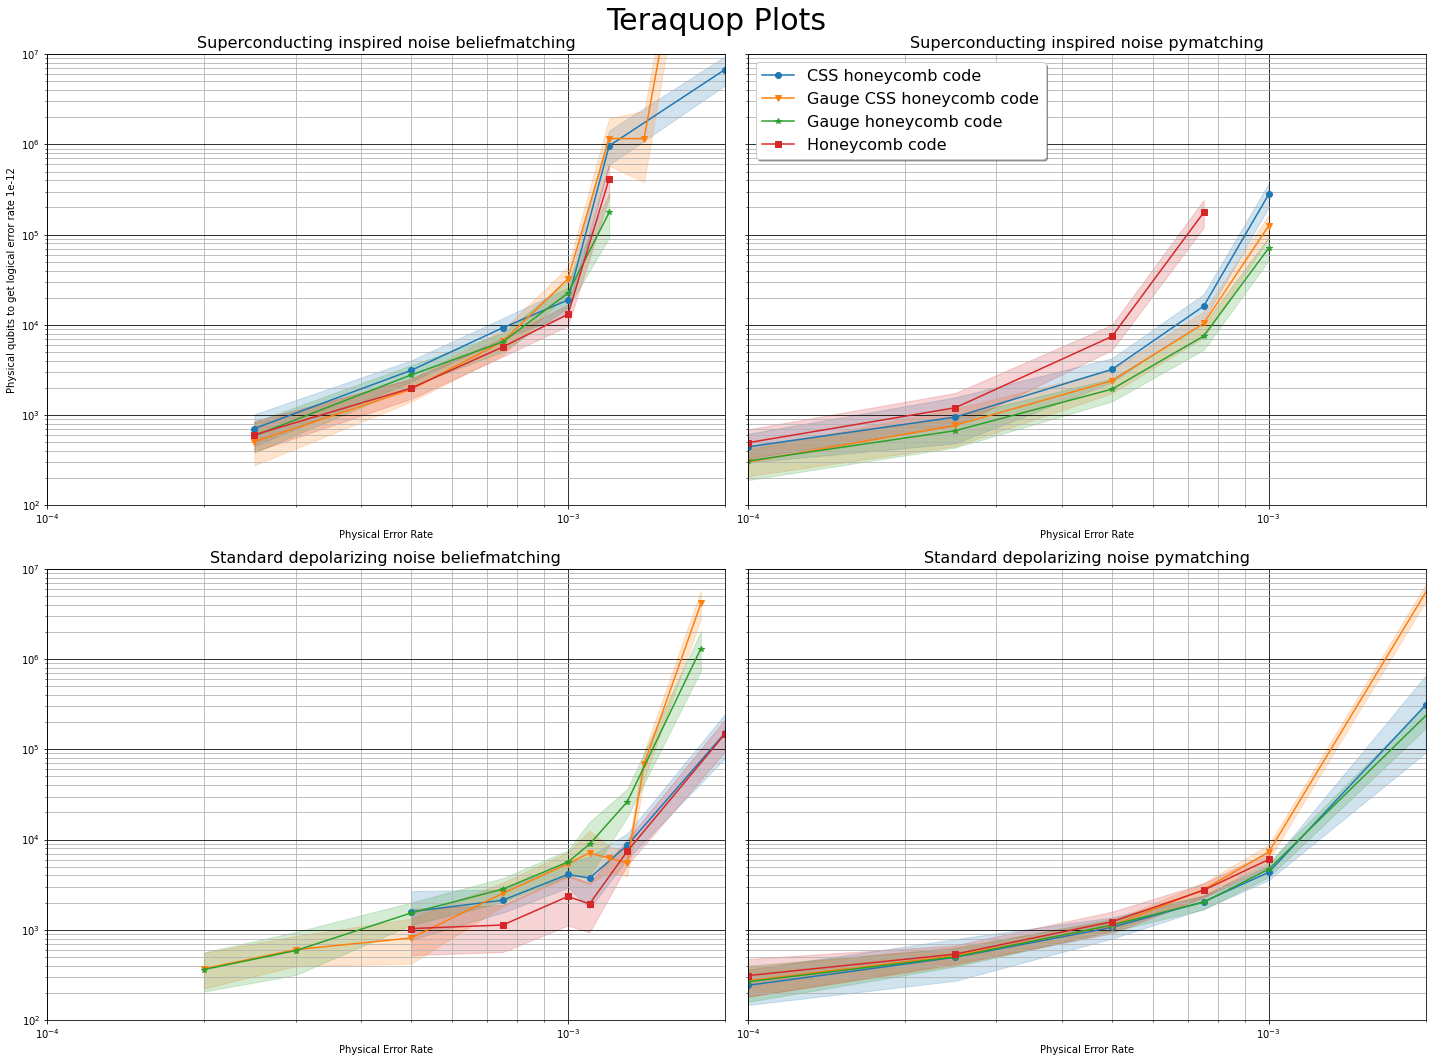

In [11]:
import argparse
import math
import sys
from typing import Optional, List, Any, Tuple, Callable

import sinter
from matplotlib import pyplot as plt



def extrapolate_footprint_achieving_error_rate(
        group: List[sinter.TaskStats],
        *,
        target_p: float,
        failure_unit_func: Callable[[sinter.TaskStats], float],
) -> Optional[sinter.Fit]:
    assert len({stat.json_metadata['p'] for stat in group}) == 1
    sqrt_qs = []
    log_ps = []
    for stat in group:
        if stat.shots:
            p_shot = stat.errors / stat.shots
            if 0 < p_shot < 0.5:
                p_unit = p_shot
                sqrt_qs.append(math.sqrt(stat.json_metadata['distance']**2))
                log_ps.append(math.log(p_unit))

    if len(log_ps) < 2:
        # Can't interpolate a slope from 1 data point.
        return None

    slope_fit = sinter.fit_line_slope(
        xs=log_ps,
        ys=sqrt_qs,
        max_extra_squared_error=1,
    )
    if slope_fit.best >= 0:
        # Slope is going the wrong way! Definitely over threshold.
        return None

    fit = sinter.fit_line_y_at_x(
        xs=log_ps,
        ys=sqrt_qs,
        target_x=math.log(target_p),
        max_extra_squared_error=1,
    )

    return sinter.Fit(
        low=fit.low**2,
        best=fit.best**2,
        high=fit.high**2,
    )


def teraquop_curve(
        group: List[sinter.TaskStats],
        *,
        target_p: float,
        failure_unit_func: Callable[[sinter.TaskStats], float],
) -> Tuple[List[float], List[float], List[float], List[float]]:
    xs = []
    ys_best = []
    ys_low = []
    ys_high = []
    p_groups = sinter.group_by(group, key=lambda stats: stats.json_metadata['p'])
    for p in sorted(p_groups.keys()):
        p_group = p_groups[p]
        pt = extrapolate_footprint_achieving_error_rate(
            p_group,
            target_p=target_p,
            failure_unit_func=failure_unit_func,
        )
        if pt is not None:
            xs.append(p)
            ys_best.append(pt.best)
            ys_low.append(pt.low)
            ys_high.append(pt.high)
    return xs, ys_low, ys_best, ys_high

        
stats: List[sinter.TaskStats] = samples
target_p = 1e-12
failure_unit_func = None

stats_sc_pymatching = [
    stat
    for stat in stats
    if stat.json_metadata['noise_model'] == 'SuperconductingNoise' and (stat.json_metadata['r'] in [3,6,6,12])  == True and stat.decoder == 'pymatching'
]

stats_sc = [
    stat
    for stat in stats
    if stat.json_metadata['noise_model'] == 'SuperconductingNoise' and (stat.json_metadata['r'] in [3,6,6,12])  == True and stat.decoder == 'beliefmatching'
]

stats_sd_pymatching = [
    stat
    for stat in stats
    if stat.json_metadata['noise_model'] == 'CircuitLevelNoise' and (stat.json_metadata['r'] in [2,4,4,8])  == True and stat.decoder == 'pymatching'
]

stats_sd = [
    stat
    for stat in stats
    if stat.json_metadata['noise_model'] == 'CircuitLevelNoise' and (stat.json_metadata['r'] in [2,4,4,8])  == True and stat.decoder == 'beliefmatching'
]



markers = "ov*sp^<>8PhH+xXDd|" * 100
import matplotlib.colors
colors = list(matplotlib.colors.TABLEAU_COLORS) * 3

ax: plt.Axes
fig: plt.Figure
fig, axis = plt.subplots(2, 2, figsize=(20, 15), sharey=True)

def plot_teraquop(stats, ax):
    groups = sinter.group_by(stats, key=lambda stats: stats.json_metadata['p'] and stats.json_metadata['code'])
    curves = {
        key: teraquop_curve(
            groups[key],
            target_p=target_p,
            failure_unit_func=failure_unit_func,
        )
        for key in sorted(groups.keys())
    }

    for k, (d, (xs, ys_low, ys_best, ys_high)) in enumerate(curves.items()):
        ax.fill_between(xs, ys_low, ys_high, alpha=0.2, color=colors[k])
    for k, (d, (xs, ys_low, ys_best, ys_high)) in enumerate(curves.items()):
        if d == "HoneycombCodeX":
            d= "Honeycomb code"
        elif d == "GaugeHoneycombCodeX":
            d= "Gauge honeycomb code"
        elif d == "FloquetColourCodeX":
            d="CSS honeycomb code"
        else:
            d="Gauge CSS honeycomb code"
        ax.plot(xs, ys_best, label=d, marker=markers[k], color=colors[k])

plot_teraquop(stats_sc, axis[0][0])
plot_teraquop(stats_sd, axis[1][0])
plot_teraquop(stats_sc_pymatching, axis[0][1])
plot_teraquop(stats_sd_pymatching, axis[1][1])


for two_ax in axis:
    for ax in two_ax:
        ax.set_xlabel("Physical Error Rate")
        ax.set_ylim(1e2, 1e7)
        ax.set_xlim(1e-4, 0.2e-2)
        ax.loglog()
        ax.grid(which='minor')
        ax.grid(which='major', color='black')

axis[0][0].set_ylabel(f"Physical qubits to get logical error rate {target_p}")

axis[0][0].set_title('Superconducting inspired noise beliefmatching', fontsize=16)
axis[0][1].set_title('Superconducting inspired noise pymatching', fontsize=16)


axis[1][0].set_title('Standard depolarizing noise beliefmatching', fontsize=16)
axis[1][1].set_title('Standard depolarizing noise pymatching', fontsize=16)

axis[0][1].legend(loc='upper left', fontsize=16, fancybox=True, shadow=True)
fig.suptitle('Teraquop Plots', fontsize=30)
plt.tight_layout()
plt.savefig('teraquop.svg')

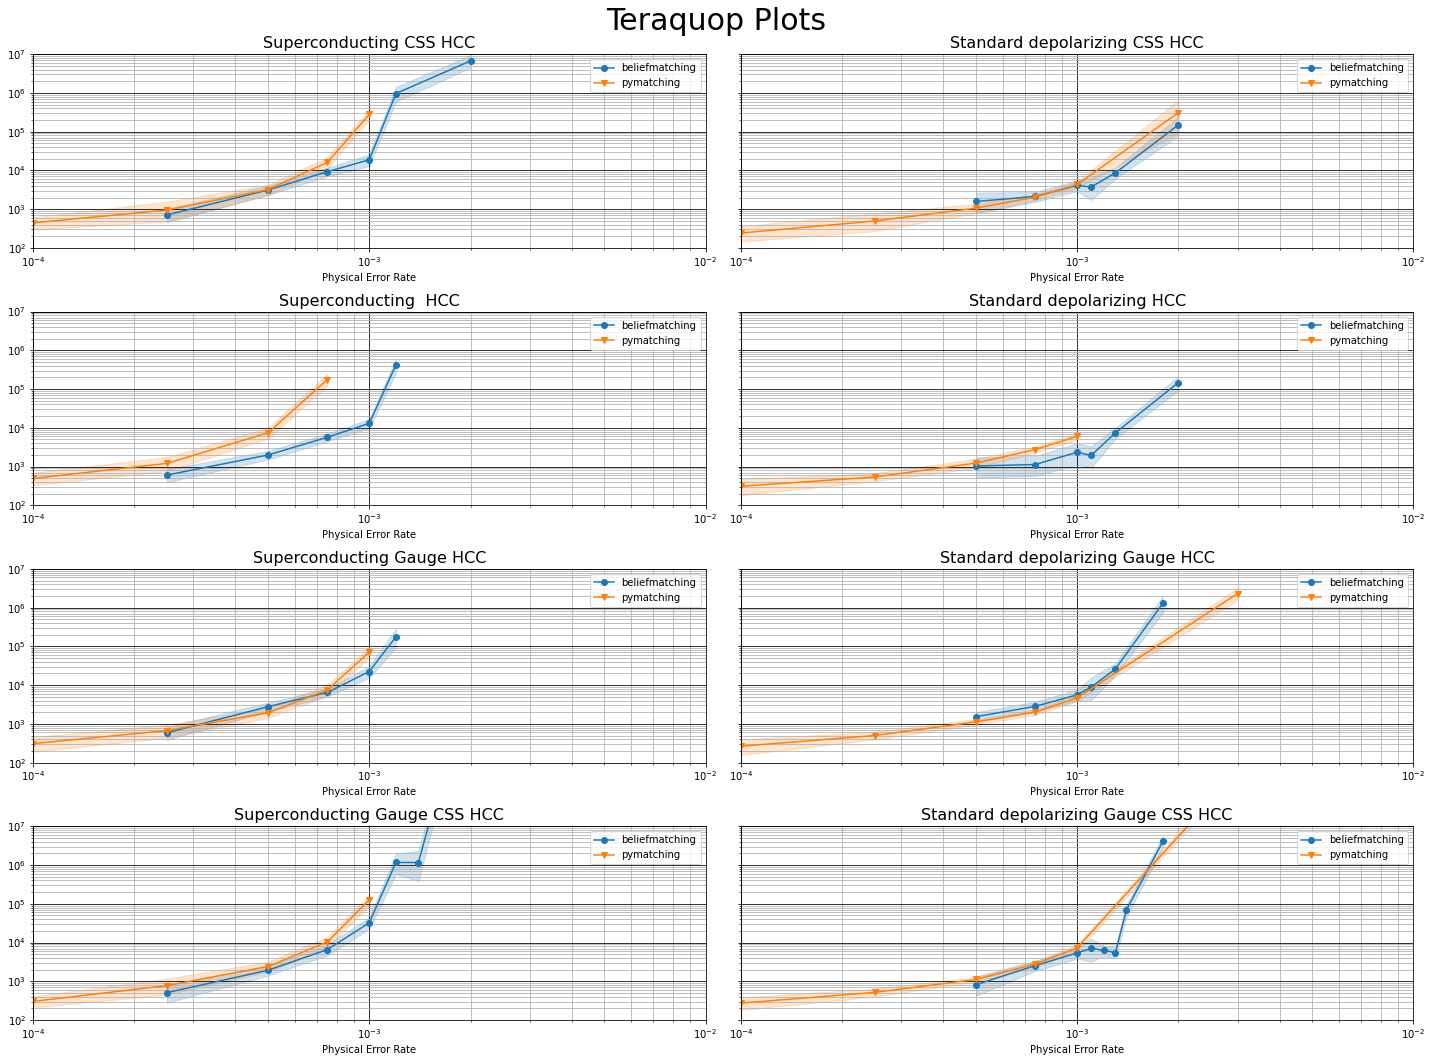

In [8]:
import argparse
import math
import sys
from typing import Optional, List, Any, Tuple, Callable

import sinter
from matplotlib import pyplot as plt



def extrapolate_footprint_achieving_error_rate(
        group: List[sinter.TaskStats],
        *,
        target_p: float,
        failure_unit_func: Callable[[sinter.TaskStats], float],
) -> Optional[sinter.Fit]:
    assert len({stat.json_metadata['p'] for stat in group}) == 1
    sqrt_qs = []
    log_ps = []
    for stat in group:
        if stat.shots:
            p_shot = stat.errors / stat.shots
            if 0 < p_shot < 0.5:
                p_unit = p_shot
                sqrt_qs.append(math.sqrt(stat.json_metadata['distance']**2))
                log_ps.append(math.log(p_unit))

    if len(log_ps) < 2:
        # Can't interpolate a slope from 1 data point.
        return None

    slope_fit = sinter.fit_line_slope(
        xs=log_ps,
        ys=sqrt_qs,
        max_extra_squared_error=1,
    )
    if slope_fit.best >= 0:
        # Slope is going the wrong way! Definitely over threshold.
        return None

    fit = sinter.fit_line_y_at_x(
        xs=log_ps,
        ys=sqrt_qs,
        target_x=math.log(target_p),
        max_extra_squared_error=1,
    )

    return sinter.Fit(
        low=fit.low**2,
        best=fit.best**2,
        high=fit.high**2,
    )


def teraquop_curve(
        group: List[sinter.TaskStats],
        *,
        target_p: float,
        failure_unit_func: Callable[[sinter.TaskStats], float],
) -> Tuple[List[float], List[float], List[float], List[float]]:
    xs = []
    ys_best = []
    ys_low = []
    ys_high = []
    p_groups = sinter.group_by(group, key=lambda stats: stats.json_metadata['p'])
    for p in sorted(p_groups.keys()):
        p_group = p_groups[p]
        pt = extrapolate_footprint_achieving_error_rate(
            p_group,
            target_p=target_p,
            failure_unit_func=failure_unit_func,
        )
        if pt is not None:
            xs.append(p)
            ys_best.append(pt.best)
            ys_low.append(pt.low)
            ys_high.append(pt.high)
    return xs, ys_low, ys_best, ys_high

def plot_code(code_name, noise_model, ax):        
    stats: List[sinter.TaskStats] = samples
    target_p = 1e-12
    failure_unit_func = None

    markers = "ov*sp^<>8PhH+xXDd|" * 100
    import matplotlib.colors
    colors = list(matplotlib.colors.TABLEAU_COLORS) * 3
    if noise_model == 'CircuitLevelNoise':
        stats= [
            stat
            for stat in stats
            if stat.json_metadata['noise_model'] == noise_model and (stat.json_metadata['r'] in [2,4,4,8])  == True and stat.json_metadata['code'] == code_name
        ]
    else:
        stats= [
                    stat
                    for stat in stats
                    if stat.json_metadata['noise_model'] == noise_model and (stat.json_metadata['r'] in [3,6,6,12])  == True and stat.json_metadata['code'] == code_name
                ]
    
    groups = sinter.group_by(stats, key=lambda stats: stats.json_metadata['p'] and stats.decoder) #and stats.json_metadata['r']),
    curves = {
        key: teraquop_curve(
            groups[key],
            target_p=target_p,
            failure_unit_func=failure_unit_func,
        )
        for key in sorted(groups.keys())
    }

    for k, (d, (xs, ys_low, ys_best, ys_high)) in enumerate(curves.items()):
        ax.fill_between(xs, ys_low, ys_high, alpha=0.2, color=colors[k])
    for k, (d, (xs, ys_low, ys_best, ys_high)) in enumerate(curves.items()):
#        print(d)
        if d == "HoneycombCodeX":
            d= "Honeycomb code"
        elif d == "GaugeHoneycombCodeX":
            d= "Gauge honeycomb code"
        elif d == "FloquetColourCodeX":
            d="CSS honeycomb code"
        else:
            d=str(d)
        ax.plot(xs, ys_best, label=d, marker=markers[k], color=colors[k])


ax: plt.Axes
fig: plt.Figure
fig, axis = plt.subplots(4, 2, figsize=(20, 15), sharey=True)


plot_code('FloquetColourCodeX', 'SuperconductingNoise', axis[0][0])
plot_code('FloquetColourCodeX', 'CircuitLevelNoise', axis[0][1])

plot_code('HoneycombCodeX', 'SuperconductingNoise', axis[1][0])
plot_code('HoneycombCodeX', 'CircuitLevelNoise', axis[1][1])

plot_code('GaugeHoneycombCodeX', 'SuperconductingNoise', axis[2][0])
plot_code('GaugeHoneycombCodeX', 'CircuitLevelNoise', axis[2][1])

plot_code('GaugeFloquetColourCodeX', 'SuperconductingNoise', axis[3][0])
plot_code('GaugeFloquetColourCodeX', 'CircuitLevelNoise', axis[3][1])

for two_ax in axis:
    for ax in two_ax:
        ax.set_xlabel("Physical Error Rate")
        ax.set_ylim(1e2, 1e7)
        ax.set_xlim(1e-4, 1e-2)
        ax.loglog()
        ax.grid(which='minor')
        ax.grid(which='major', color='black')
        ax.legend()

#axis[0].set_ylabel(f"Physical qubits to get logical error rate {target_p}")
axis[0][0].set_title('Superconducting CSS HCC', fontsize=16)
axis[0][1].set_title('Standard depolarizing CSS HCC', fontsize=16)
axis[1][0].set_title('Superconducting  HCC', fontsize=16)
axis[1][1].set_title('Standard depolarizing HCC', fontsize=16)
axis[2][0].set_title('Superconducting Gauge HCC', fontsize=16)
axis[2][1].set_title('Standard depolarizing Gauge HCC', fontsize=16)
axis[3][0].set_title('Superconducting Gauge CSS HCC', fontsize=16)
axis[3][1].set_title('Standard depolarizing Gauge CSS HCC', fontsize=16)


#axis[0].legend()
#axis[1].set_title('Standard depolarizing noise', fontsize=16)
#$axis[1].legend(loc='upper left', fontsize=16, fancybox=True, shadow=True)
fig.suptitle('Teraquop Plots', fontsize=30)
plt.tight_layout()
plt.savefig('teraquop_bm_vs_pymatching.svg')